## 환경설정

In [1]:
# api key
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH17-LANGGRAPH")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH17-LANGGRAPH


## 노드와 엣지

주요 개념

- GraphState(상태 저장 그래프): LangGraph는 그래프의 각 노드가 계산의 단계를 나타내며, 그래프는 계산이 진행됨에 따라 전달되고 업데이트되는 상태를 유지하는 상태 저장 그래프 개념을 중심으로 작동합니다.
- Node(노드): 노드는 LangGraph의 구성 요소입니다. 각 노드는 함수 또는 계산 단계를 나타냅니다. 입력 처리, 의사 결정, 외부 API와의 상호 작용 등 특정 작업을 수행하도록 노드를 정의할 수 있습니다.
- Edge(엣지): 에지는 그래프에서 노드를 연결하여 계산의 흐름을 정의합니다. LangGraph는 조건부 에지를 지원하므로 그래프의 현재 상태에 따라 실행할 다음 노드를 동적으로 결정할 수 있습니다.


## GraphState

각 노드에서 다음 노드로 전달되는 상태를 저장합니다.

In [4]:
from typing import TypedDict


# GraphState 요소는 상태를 전달하는 용도로 사용됩니다.
class GraphState(TypedDict):
    goal: str  # 목표
    todo: list[str]  # 할 일 목록
    current_job: str  # 현재 작업
    total_time: int  # 총 소요시간(시간)
    time_spent: int  # 소요 시간(시간)
    status: str  # 상태(진행중, 다음 작업, 종료)

## Node & Edge

In [ ]:
from langchain_openai import ChatOpenAI

In [6]:
from langchain_ollama.llms import OllamaLLM
from langchain_ollama import OllamaEmbeddings
from langchain_ollama import ChatOllama

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import CommaSeparatedListOutputParser
from rag.utils import format_task

In [ ]:
def create_todo_list(goal, model_name='gemma2:2b'):
    print(f"create_todo_list: {goal}")
    output_parser = CommaSeparatedListOutputParser()
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are my secretary managing my tasks. Your job is making a list of tasks for my goal..",
            ),
            (
                "human",
                "Make a list of tasks for the given my goal to do well. Make it as `todo:taken time(hour)`. taken time is integer as round number.\n\n#goal: {goal}\n\n#format: {format_instuctions}",
            ),
        ]
    )
    prompt = prompt.partial(format_instuctions=output_parser.get_format_instructions())
    llm = ChatOllama(model=model_name)
    chain = prompt | llm | CommaSeparatedListOutputParser()

    output = chain.invoke({"goal": goal})
    return output

In [41]:
# model_name = "qwen2:0.5b"
model_name = "gemma2:2b"

In [48]:
todo = create_todo_list("Studying RAG with LangChain tutorials", model_name=model_name)
todo

create_todo_list: Studying RAG with LangChain tutorials


["Here's a task breakdown for studying RAG with LangChain tutorials: \n\n**todo: Complete Language Models Basics (4 hours)** \n* **Learn the Fundamentals:**  Familiarize yourself with natural language processing concepts and the basics of large language models. Explore resources like Google AI's NLTK examples or Stanford NLP course on Coursera. \n   - *Resources:* [https://github.com/google-research/language-model-basics](https://github.com/google-research/language-model-basics) - Course: [https://www.coursera.org/learn/natural-language-processing](https://www.coursera.org/learn/natural-language-processing)\n\n**todo: Deep Dive into RAG (4 hours)** \n* **Fundamentals of RAG:**  Understand the core principles of Retrieval Augmented Generation (RAG)",
 'including query input',
 'embedding methods',
 "and document retrieval. \n   - *Resources:*  [https://huggingface.co/docs/transformers/model_doc/rag](https://huggingface.co/docs/transformers/model_doc/rag) [https://towardsdatascience.com/

Here's a breakdown of tasks to help you achieve your goal, formatted as requested: 

**Task List** | **Time**
--- | ---
Read Introduction to RAG in LangChain Tutorials  | 1
Understand the Basics of Language Models & Prompt Engineering | 2
Explore Different RAG Applications (e.g., text summarization, question answering) | 4
Experiment with LangChain's API for RAG implementation | 3
Practice building and running simple RAG models | 2
Create a document outlining your findings & learnings from each step  | 1.5
**Optional:** Contribute to the open-source community by developing a custom RAG module or adding enhancements to existing libraries. | Time Dependent (This can be a long-term project)

**Remember:**  Time estimations are flexible based on your prior knowledge and learning pace!  

Let me know if you'd like me to help you break down these tasks into smaller actionable steps. 


Here's a task breakdown for studying RAG with LangChain tutorials: 

**todo: Complete Language Models Basics (4 hours)** 
* **Learn the Fundamentals:**  Familiarize yourself with natural language processing concepts and the basics of large language models. Explore resources like Google AI's NLTK examples or Stanford NLP course on Coursera. 
   - *Resources:* [https://github.com/google-research/language-model-basics](https://github.com/google-research/language-model-basics) - Course: [https://www.coursera.org/learn/natural-language-processing](https://www.coursera.org/learn/natural-language-processing)

**todo: Deep Dive into RAG (4 hours)** 
* **Fundamentals of RAG:**  Understand the core principles of Retrieval Augmented Generation (RAG), including query input, embedding methods, and document retrieval. 
   - *Resources:*  [https://huggingface.co/docs/transformers/model_doc/rag](https://huggingface.co/docs/transformers/model_doc/rag) [https://towardsdatascience.com/ragged-language-modeling-an-introduction-1304b9536279](https://towardsdatascience.com/ragged-language-modeling-an-introduction-1304b9536279)

**todo: Experiment with LangChain (8 hours)** 
* **Implement RAG:**  Apply the theoretical knowledge to a practical example using LangChain's RAG implementation. Create a simple application that demonstrates the process of retrieving documents, generating text based on them, and incorporating it into your workflow. 

**todo: Advanced Techniques & Applications (4 hours)**
*  **Advanced Concepts:** Explore specific advanced techniques for RAG, such as: 
    - **Multimodal RAG**: Integrating image and text data for richer retrieval. 
    - **Personalized RAG**: Tailor the generation process to individual user preferences.  
    - **Contextualized RAG**: Improve accuracy by incorporating context from previous interactions.

**todo: Project Exploration (4 hours)**
* **Advanced Project Ideas:**  Brainstorm ideas for a larger project that leverages LangChain's capabilities for RAG, such as: 
    - A personalized note-taking application with RAG to automatically generate summaries. 
    - An interactive chatbot powered by RAG for engaging in more dynamic dialogue.

**todo: Documentation & Sharing (4 hours)**
* **Record your learnings:** Create a documentation of the process you went through, including challenges encountered and solutions implemented. This can serve as reference materials for future projects or be shared with others who are interested in learning about RAG with LangChain. 


Let me know if you want to break down these tasks further! 

* **Research:** LangChain features and best practices (2 hours)
    * Explore the official Langchain documentation. 
    *  Identify top use cases for LangChain in different domains (e.g., AI chatbots, data analysis).
* **Project Organization & Documentation:** (1 hour)
    * Create a folder structure for project materials: Presentations, code snippets, scripts etc.
    * Develop a detailed outline of the presentation structure. 
* **Content Creation:** (3 hours)
    * Write draft content for each section of the presentation: Introduction, key features, use cases, benefits of LangChain. 
    * Ensure clear and concise language, with visuals incorporated where appropriate. 

**Total time estimate: 6 hours** 


Let me know if you'd like to refine this breakdown further or have specific topics within LangChain that require more focus! 

In [117]:
def get_fake_answer():
    return """Complete Language Models Basics - Learn the Fundamentals : 4 hours
Deep Dive into RAG - Fundamentals of RAG : 4 hours
Experiment with LangChain - Implement RAG : 8 hours
Advanced Techniques & Applications - Multimodal, Personalized, Contexturalized : 4 hours
Project Exploration - Advanced Project Ideas : 4 hours
Documentation & Sharing - Record your learnings : 4 hours
"""

In [118]:
get_fake_answer()

'Complete Language Models Basics - Learn the Fundamentals : 4 hours\nDeep Dive into RAG - Fundamentals of RAG : 4 hours\nExperiment with LangChain - Implement RAG : 8 hours\nAdvanced Techniques & Applications - Multimodal, Personalized, Contexturalized : 4 hours\nProject Exploration - Advanced Project Ideas : 4 hours\nDocumentation & Sharing - Record your learnings : 4 hours\n'

In [120]:
def format_task(tasks):
    # 결과를 저장할 빈 리스트 생성
    task_time_pairs = []

    tasks = tasks.split('\n')

    # 리스트를 순회하면서 각 항목을 처리
    for item in tasks:
        if len(item) > 0:
            # 콜론(:) 기준으로 문자열을 분리
            task, time_str = item.rsplit(":", 1)
            # '시간' 문자열을 제거하고 정수로 변환
            time = int(time_str.replace("hours", "").strip())
            # 할 일과 시간을 튜플로 만들어 리스트에 추가
            task_time_pairs.append((task, time))

    # 결과 출력
    return task_time_pairs


In [127]:
format_task(get_fake_answer())

[('Complete Language Models Basics - Learn the Fundamentals ', 4),
 ('Deep Dive into RAG - Fundamentals of RAG ', 4),
 ('Experiment with LangChain - Implement RAG ', 8),
 ('Advanced Techniques & Applications - Multimodal, Personalized, Contexturalized ',
  4),
 ('Project Exploration - Advanced Project Ideas ', 4),
 ('Documentation & Sharing - Record your learnings ', 4)]

## 각 노드의 세부 기능 정의

In [115]:
def list_todo(state: GraphState) -> GraphState:
    goal = state["goal"]
    # 리스트 작성
    # todo = create_todo_list(goal, model_name=model_name)
    todo = get_fake_answer()
    # 할 일 목록을 포맷팅
    # todo = format_task(create_todo_list(todo))
    todo = format_task(todo)
    return GraphState(todo=todo)

In [107]:
def start_job(state: GraphState) -> GraphState:
    todo = state["todo"]
    if len(todo):
        current_job, total_time = todo.pop(0)
        status = "진행중"
        time_spent = 0
    return GraphState(
        current_job=current_job,
        total_time=total_time,
        status=status,
        time_spent=time_spent,
    )

In [108]:
def process_job(state: GraphState) -> GraphState:
    time_spent = state["time_spent"]
    time_spent += 1
    return GraphState(time_spent=time_spent)

In [124]:
def check_progress(state: GraphState) -> GraphState:
    print(f"check_progress: {state["time_spent"]} / {state["total_time"]}")
    if state["time_spent"] >= state["total_time"]:
        status = "다음 작업"
        if len(state["todo"]) == 0:
            status = "종료"
    else:
        status = "진행중"
    return GraphState(status=status)

In [110]:
def next_step(state: GraphState) -> GraphState:
    return state["status"]

## 그래프 정의

In [83]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

def get_app():
    # langgraph.graph에서 StateGraph와 END를 가져옵니다.
    workflow = StateGraph(GraphState)
    
    # Todo 를 작성합니다.
    workflow.add_node("list_todo", list_todo)  # 에이전트 노드를 추가합니다.
    
    # Todo 작업을 시작합니다.
    workflow.add_node("start_job", start_job)
    
    # 작업을 진행합니다.
    workflow.add_node("process_job", process_job)
    
    # 작업을 중간 체크합니다.
    workflow.add_node("check_progress", check_progress)
    
    # 각 노드들을 연결합니다.
    workflow.add_edge("list_todo", "start_job")
    workflow.add_edge("start_job", "process_job")
    workflow.add_edge("process_job", "check_progress")
    
    # 조건부 엣지를 추가합니다.
    workflow.add_conditional_edges(
        "check_progress",  # 관련성 체크 노드에서 나온 결과를 is_relevant 함수에 전달합니다.
        next_step,
        {
            "진행중": "process_job",  # 관련성이 있으면 종료합니다.
            "다음 작업": "start_job",  # 관련성이 없으면 다시 답변을 생성합니다.
            "종료": END,  # 관련성 체크 결과가 모호하다면 다시 답변을 생성합니다.
        },
    )
    
    # 시작점을 설정합니다.
    workflow.set_entry_point("list_todo")
    
    # 기록을 위한 메모리 저장소를 설정합니다.
    memory = MemorySaver()
    
    # 그래프를 컴파일합니다.
    app = workflow.compile(checkpointer=memory)
    return app

## 그래프 시각화

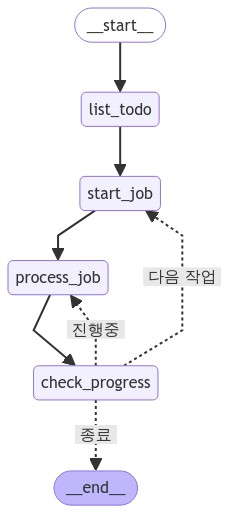

In [27]:
from IPython.display import Image, display

try:
    display(
        Image(app.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. 
       # xray=True는 추가적인 세부 정보를 포함합니다.
except:
    # 이 부분은 추가적인 의존성이 필요하며 선택적으로 실행됩니다.
    pass

## +2 ... Run

In [125]:
app = get_app()

In [126]:
import pprint
from langgraph.errors import GraphRecursionError
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(recursion_limit=100, configurable={"thread_id": "TODO"})

# GraphState 객체를 활용하여 질문을 입력합니다.
inputs = GraphState(goal="To prepare a presentation of LangChain at meet-up")

# app.stream을 통해 입력된 메시지에 대한 출력을 스트리밍합니다.
try:
    for output in app.stream(inputs, config=config):
        # 출력된 결과에서 키와 값을 순회합니다.
        for key, value in output.items():
            # 노드의 이름과 해당 노드에서 나온 출력을 출력합니다.
            pprint.pprint(f"[NODE] {key}")
            for k, v in value.items():
                pprint.pprint(f"<{k}> {v}")
            pprint.pprint("===" * 10)
            # 출력 값을 예쁘게 출력합니다.
            # pprint.pprint(value, indent=2, width=80, depth=None)
except GraphRecursionError as e:
    pprint.pprint(f"Recursion limit reached: {e}")

'[NODE] list_todo'
("<todo> [('Complete Language Models Basics - Learn the Fundamentals ', 4), "
 "('Deep Dive into RAG - Fundamentals of RAG ', 4), ('Experiment with "
 "LangChain - Implement RAG ', 8), ('Advanced Techniques & Applications - "
 "Multimodal, Personalized, Contexturalized ', 4), ('Project Exploration - "
 "Advanced Project Ideas ', 4), ('Documentation & Sharing - Record your "
 "learnings ', 4)]")
'=============================='
'[NODE] start_job'
'<current_job> Complete Language Models Basics - Learn the Fundamentals '
'<total_time> 4'
'<time_spent> 0'
'<status> 진행중'
'=============================='
'[NODE] process_job'
'<time_spent> 1'
'=============================='
check_progress: 1 / 4
'[NODE] check_progress'
'<status> 진행중'
'=============================='
'[NODE] process_job'
'<time_spent> 2'
'=============================='
check_progress: 2 / 4
'[NODE] check_progress'
'<status> 진행중'
'=============================='
'[NODE] process_job'
'<time_spent> 3'
'======

## LangSmith 추적

- 추적: https://smith.langchain.com/public/d4857c97-bbb7-4776-8c90-c3908b77a38f/r